In [33]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [34]:
max([max(sequence) for sequence in train_data])

9999

In [35]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [36]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [37]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
from keras import losses
from keras import metrics
from keras import optimizers

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [40]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.5247 - acc: 0.7773 - val_loss: 0.3994 - val_acc: 0.8669
Epoch 2/20
15000/15000 [==============================] - 4s 256us/step - loss: 0.3113 - acc: 0.9031 - val_loss: 0.3327 - val_acc: 0.8695
Epoch 3/20
15000/15000 [==============================] - 4s 237us/step - loss: 0.2277 - acc: 0.9262 - val_loss: 0.3469 - val_acc: 0.8550
Epoch 4/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.1808 - acc: 0.9409 - val_loss: 0.2726 - val_acc: 0.8910
Epoch 5/20
15000/15000 [==============================] - 4s 269us/step - loss: 0.1498 - acc: 0.9505 - val_loss: 0.2768 - val_acc: 0.8906
Epoch 6/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.1228 - acc: 0.9625 - val_loss: 0.2886 - val_acc: 0.8879
Epoch 7/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.1016 - acc: 0.9689 - val_loss: 0.3169 - 

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

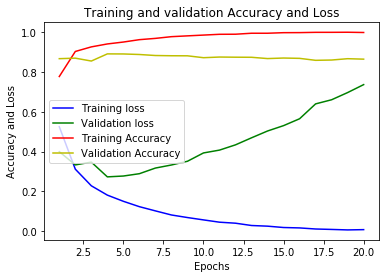

In [42]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_dict['val_acc']) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.plot(epochs, acc_values, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'y', label='Validation Accuracy')

plt.title('Training and validation Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 4s 145us/step - loss: 0.4875 - accuracy: 0.8146
Epoch 2/4
25000/25000 [==============================] - 3s 138us/step - loss: 0.2860 - accuracy: 0.9076
Epoch 3/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2158 - accuracy: 0.9256
Epoch 4/4
25000/25000 [==============================] - 4s 141us/step - loss: 0.1793 - accuracy: 0.9372


In [44]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 5s 192us/step


In [45]:
model.predict(x_test)

array([[0.21492785],
       [0.9999193 ],
       [0.85703146],
       ...,
       [0.12664708],
       [0.08072433],
       [0.5070567 ]], dtype=float32)

In [55]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.4791 - accuracy: 0.7841 - val_loss: 0.3629 - val_accuracy: 0.8520
Epoch 2/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.2620 - accuracy: 0.9053 - val_loss: 0.2778 - val_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 4s 283us/step - loss: 0.1903 - accuracy: 0.9299 - val_loss: 0.2769 - val_accuracy: 0.8907
Epoch 4/20
15000/15000 [==============================] - 4s 283us/step - loss: 0.1319 - accuracy: 0.9545 - val_loss: 0.3069 - val_accuracy: 0.8842
Epoch 5/20
15000/15000 [==============================] - 4s 290us/step - loss: 0.1078 - accuracy: 0.9613 - val_loss: 0.3178 - val_accuracy: 0.8850
Epoch 6/20
15000/15000 [==============================] - 4s 286us/step - loss: 0.0784 - accuracy: 0.9749 - val_loss: 0.3575 - val_accuracy: 0.8808
Epoch 7/20
15000/15000 [==============================] - 4s 2

In [56]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

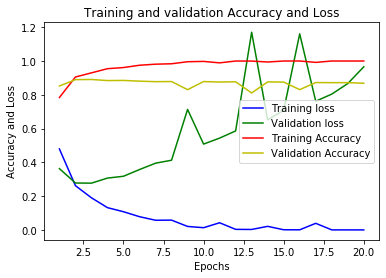

In [57]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['val_accuracy']) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.plot(epochs, acc_values, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'y', label='Validation Accuracy')

plt.title('Training and validation Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()